## Tutorial 2 : Predator-prey

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# initialize parameters
dt = 0.003
end_time = 20
t_array = np.arange(0, end_time, dt)
timesteps = np.size(t_array)
alpha = 4.0
beta = 2.0
gamma = 4.0
delta = 3.0
x_0 = 10.0
y_0 = 5.0

In [5]:
def get_dx_dt(x, y):
    return alpha*x - beta*x*y
def get_dy_dt(x, y):
    return delta*x*y - gamma*y

In [6]:
# explicit solution
x_exp = np.zeros(timesteps)
y_exp = np.zeros(timesteps)

x_exp[0] = x_0
y_exp[0] = y_0

for t in range(timesteps - 1):
    x_exp[t+1] = x_exp[t] + dt*get_dx_dt(x_exp[t], y_exp[t])
    y_exp[t+1] = y_exp[t] + dt*get_dy_dt(x_exp[t], y_exp[t])


#### RK4
We will find $\frac{dx}{dt}, \frac{dy}{dt}$ at 4 times and then take a weighted average. First at the time $t$:
$$k_{1x} = f(x_t, y_t) \quad k_{1y} = g(x_t, y_t)$$
At the midpoint $t + 0.5 \Delta t$,
$$k_{2x} = f\left(x_t + k_{1x}\frac{\Delta t}{2}, y_t + k_{1y}\frac{\Delta t}{2}\right) \quad k_{2y} = g\left(x_t + k_{1x}\frac{\Delta t}{2}, y_t + k_{1y}\frac{\Delta t}{2}\right)$$
Again at the midpoint $t + 0.5 \Delta t$, but using the previous slope $k_2$,
$$k_{3x} = f\left(x_t + k_{2x}\frac{\Delta t}{2}, y_t + k_{2y}\frac{\Delta t}{2}\right) \quad k_{3y} = g\left(x_t + k_{2x}\frac{\Delta t}{2}, y_t + k_{2y}\frac{\Delta t}{2}\right)$$
At the time $t+1$
$$k_{4x} = f(x_t + k_{3x}\Delta t, y_t + k_{3y}\Delta t) \quad k_{4y} = g(x_t + k_{3x}\Delta t, y_t + k_{3y}\Delta t) $$
Finally, weighing all the $\frac{dx}{dt}, \frac{dy}{dt}$, $x_{t+1}, y_{t+1}$ is,
$$ x_{t+1} = x_t + \left( \frac{k_{1x} + 2(k_{2x} + k_{3x}) + k_{4x}}{6} \right) \Delta t \quad y_{t+1} = y_t + \left( \frac{k_{1y} + 2(k_{2y} + k_{3y}) + k_{4y}}{6} \right) \Delta t $$

In [7]:
x_rk4 = np.zeros(timesteps)
y_rk4 = np.zeros(timesteps)
x_rk4[0] = x_0
y_rk4[0] = y_0
for t in range(timesteps-1):
    k1_x = get_dx_dt(x_rk4[t], y_rk4[t])
    k1_y = get_dy_dt(x_rk4[t], y_rk4[t])
    # x_tilde, y_tilde at t+ 0.5
    x_tilde = x_rk4[t] + dt*k1_x/2
    y_tilde = y_rk4[t] + dt*k1_y/2
    k2_x = get_dx_dt(x_tilde, y_tilde)
    k2_y = get_dy_dt(x_tilde, y_tilde)
    # again x_tilde, y_tilde at t+ 0.5
    x_tilde = x_rk4[t] + dt*k2_x/2
    y_tilde = y_rk4[t] + dt*k2_y/2
    k3_x = get_dx_dt(x_tilde, y_tilde)
    k3_y = get_dy_dt(x_tilde, y_tilde)
    # x_tilde, y_tilde at t+1
    x_tilde = x_rk4[t] + dt*k3_x
    y_tilde = y_rk4[t] + dt*k3_y
    k4_x = get_dx_dt(x_tilde, y_tilde)
    k4_y = get_dy_dt(x_tilde, y_tilde)
    # final weighted update, the values at t+0.5 have a higher contribution
    x_rk4[t+1] = x_rk4[t] + (k1_x + 2*k2_x + 2*k3_x + k4_x)*dt/6
    y_rk4[t+1] = y_rk4[t] + (k1_y + 2*k2_y + 2*k3_y + k4_y)*dt/6

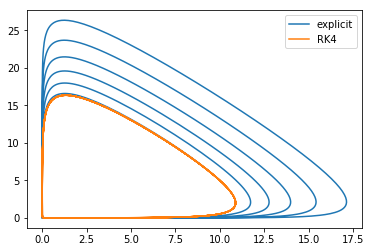

In [8]:
plt.plot(x_exp, y_exp, label='explicit')
plt.plot(x_rk4, y_rk4, label='RK4')

plt.legend()
plt.show()


### plotting population (x and y) with time
there's a phase difference between x and y.

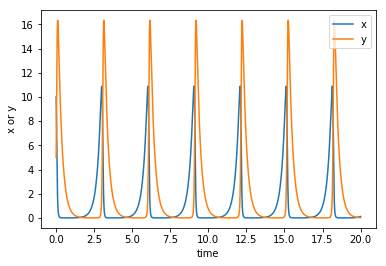

In [9]:
# to make plotting interactive: use %matplotlib notebook (but only 1 interactive window can be open at any time)
plt.plot(t_array, x_rk4, label='x')
plt.plot(t_array, y_rk4, label='y')
plt.xlabel('time')
plt.ylabel('x or y')
plt.legend()
plt.show()